In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Dense, Dropout, Input
from keras.models import Sequential 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [459]:
df = pd.read_csv('files/titanic.csv')

In [460]:
df.columns = df.columns.str.lower()

# Remplacer les valeurs nulles de la colonne "age" par la moyenne de la colonne
df["age"] = df["age"].fillna(df["age"].mean())

# Supprimer les lignes qui contiennent des valeurs nulles dans la colonne "embarked"
df = df.dropna(subset=["embarked"])

# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("cabin", axis=1)

# Supprimer la colonne "name" et "passengerid" car elles ne servent à rien pour du ML
df = df.drop(["name","passengerid"], axis=1)

# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("ticket", axis=1)

In [461]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [462]:
X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

#### Label Encoding Gender

In [463]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

#### HotEncoder Embarked

In [464]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#### Scaler

In [465]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### Split Train

In [466]:
# Séparer les données en données d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [467]:
def classification(y_test, y_pred, verbose = 0):
    nn_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_pred, y_test)

    if verbose == 1:
        print(f'Confusion Matrix: \n {cm}')
        print(f'Accuracy: {nn_accuracy}')
        print('Classification Report:')
        print(classification)

    return nn_accuracy, cm, classification

#### ANN 

In [468]:
units_hidden = 128
epochs = 100
batch_size = 32

model_cl = Sequential()
model_cl.add(Input(shape=(9,)))
model_cl.add(Dense(units=units_hidden, activation='relu'))
model_cl.add(Dropout(1/2))
model_cl.add(Dense(units=units_hidden, activation='relu'))
model_cl.add(Dropout(1/2))
model_cl.add(Dense(units=units_hidden, activation='relu'))
model_cl.add(Dropout(1/2))
model_cl.add(Dense(units=1, activation="sigmoid"))

model_cl.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
histcl = model_cl.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4516 - loss: 0.7457 - val_accuracy: 0.6742 - val_loss: 0.6703
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5407 - loss: 0.7079 - val_accuracy: 0.6910 - val_loss: 0.6517
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6159 - loss: 0.6587 - val_accuracy: 0.6854 - val_loss: 0.6378
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6141 - loss: 0.6567 - val_accuracy: 0.6798 - val_loss: 0.6269
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6610 - loss: 0.6500 - val_accuracy: 0.6798 - val_loss: 0.6172
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6118 - loss: 0.6516 - val_accuracy: 0.6854 - val_loss: 0.6081
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.6510 - val_accuracy: 0.7022 - val_loss: 0.5999
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6780 - loss: 0.6183 - val_accuracy: 0.7022 - val_loss: 0.

In [469]:
y_prednn = model_cl.predict(X_test)
y_prednn = (y_prednn > 0.5)
# print(np.concatenate((y_prednn.reshape(len(y_prednn),1), y_test.reshape(len(y_test),1)),1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [475]:
nn_accuracy, nn_cm, nn_classification = classification(y_test, y_prednn, verbose=1)

Confusion Matrix: 
 [[95 14]
 [16 53]]
Accuracy: 0.8314606741573034
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.86      0.86       111
        True       0.77      0.79      0.78        67

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [471]:
# Entraîner un modèle de régression logistique
model = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

log_accuracy, log_cm, log_classification = classification(y_test, y_pred, verbose=1)


Confusion Matrix: 
 [[84 25]
 [15 54]]
Accuracy: 0.7752808988764045
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        99
           1       0.78      0.68      0.73        79

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.77       178



c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


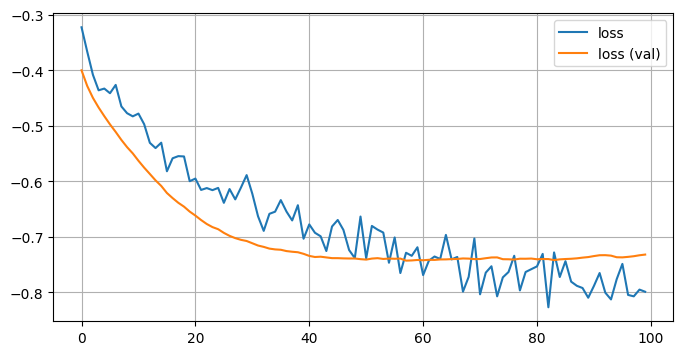

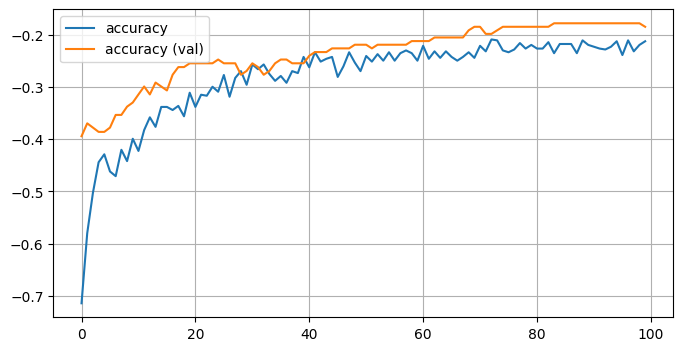

In [472]:
plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["loss"]),label="loss")
plt.plot(np.log(histcl.history["val_loss"]),label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(np.log(histcl.history["accuracy"]),label="accuracy")
plt.plot(np.log(histcl.history["val_accuracy"]),label="accuracy (val)")
plt.grid()
plt.legend()

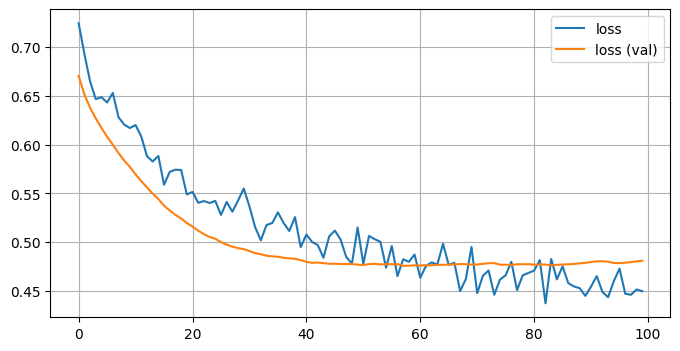

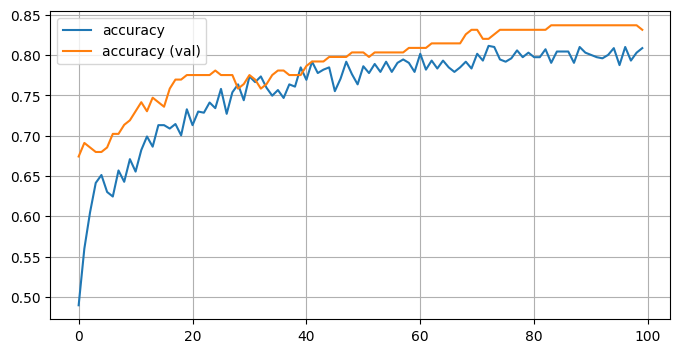

In [476]:
plt.figure(figsize=(8,4))
plt.plot(histcl.history["loss"],label="loss")
plt.plot(histcl.history["val_loss"],label="loss (val)")
plt.grid()
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(histcl.history["accuracy"],label="accuracy")
plt.plot(histcl.history["val_accuracy"],label="accuracy (val)")
plt.grid()
plt.legend()

In [473]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(units_hidden,units_hidden,units_hidden,),max_iter=epochs,batch_size=batch_size, random_state=42
)
mlp_classifier.fit(X_train, y_train)
y_predmlp = mlp_classifier.predict(X_test)

mlp_accuracy, mlp_cm, mlp_classification = classification(y_test, y_predmlp, verbose=1)

c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[85 24]
 [16 53]]
Accuracy: 0.7752808988764045
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.77      0.69      0.73        77

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.77      0.78      0.77       178



c:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


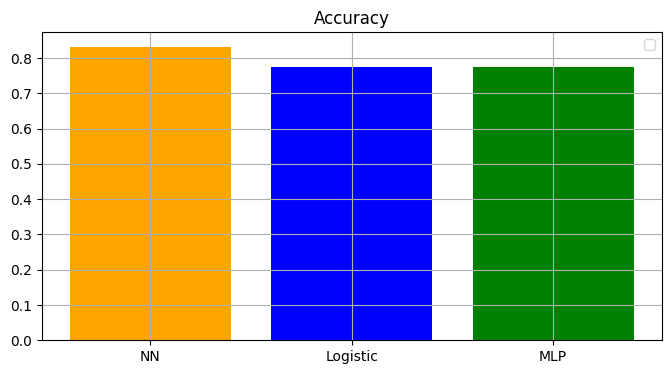

In [474]:
plt.figure(figsize=(8,4))
plt.title('Accuracy')
plt.bar(['NN','Logistic','MLP'],[nn_accuracy, log_accuracy, mlp_accuracy], color=['orange','blue','green'])
plt.grid()
plt.legend()